# Rates and Snakes: A Python Primer

## Pulling Data from an API, Doing Basic Statistical Analysis, and Working with Dates (datetime objects)
- Make you have you Python Installed on your Machine
- Packages need are `pandas` and `numpy`

In [2]:
import requests 
from datetime import datetime

# Click on the url to see structure of data
# data structure is a JSON object
# we can "enter" into the child component by using '[key]' operator

"""
{
    "soma": {
        "asOfDates": [
            "2024-07-24"
        ]
    }
}
"""

# If we want to get the date, our query would be something like:
# json_object["soma"]["asOfDates"][0]
# we use '[0]' since we are entering into a list

url = "https://markets.newyorkfed.org/api/soma/asofdates/latest.json"
soma_latest_date_response = requests.get(url)
if soma_latest_date_response.ok: 
    # If you get something other than a 200 or 201, you have/built the wrong url
    print("Status Code: ", soma_latest_date_response.status_code)
    soma_latest_date_json_object = soma_latest_date_response.json()
    latest_soma_holdings_date_string = soma_latest_date_json_object["soma"]["asOfDates"][0]
    latest_soma_holdings_date_dt = datetime.strptime(latest_soma_holdings_date_string, "%Y-%m-%d")
    print("Latest SOMA Holdings Date: ", latest_soma_holdings_date_string)

Status Code:  200
Latest SOMA Holdings Date:  2024-07-24


In [3]:
# Below is called an f-string - its like using the "&" symbol in Excel to concat - must wrap the variable in '{}'
# https://markets.newyorkfed.org/api/soma/tsy/get/asof/2024-07-24.json

# click on the url - its overwhelming and it would be a pain in the ass to parse all of this - this is why we use 'pandas'
# pandas allows us to transform JSON into a tabular form like Excel and take advantage built analysis tools

import pandas as pd
import numpy as np # very useful library for math

soma_holdings_url = f"https://markets.newyorkfed.org/api/soma/tsy/get/asof/{latest_soma_holdings_date_string}.json"
soma_holdings_response = requests.get(soma_holdings_url)
if soma_holdings_response.ok:
    soma_holdings_json = soma_holdings_response.json()
    
    # pandas can directly take in a list of JSON objects, so something like below
    """
    {
        "holdings": [
            {
                "asOfDate": "2024-07-24",
                "cusip": "912797JT5",
                "maturityDate": "2024-07-25",
                "issuer": "",
                "spread": "",
                "coupon": "",
                "parValue": "8278445300",
                "inflationCompensation": "",
                "percentOutstanding": "0.0397480484748383",
                "changeFromPriorWeek": "0",
                "changeFromPriorYear": "",
                "securityType": "Bills"
            }, 
            .....
        ]
    }
    """ 
    
    soma_holdings_df = pd.DataFrame(soma_holdings_json["soma"]["holdings"])
    display(soma_holdings_df)

,asOfDate,cusip,maturityDate,issuer,spread,coupon,parValue,inflationCompensation,percentOutstanding,changeFromPriorWeek,changeFromPriorYear,securityType
0,2024-07-24,912797JT5,2024-07-25,,,,8278445300,,0.0397480484748383,0,,Bills
1,2024-07-24,912797KR7,2024-07-30,,,,722586800,,0.0034293913803703,0,,Bills
2,2024-07-24,912797JU2,2024-08-01,,,,15011357200,,0.0698181614023913,0,,Bills
3,2024-07-24,912797KW6,2024-08-06,,,,735495800,,0.0034093687997299,0,,Bills
4,2024-07-24,912797GK7,2024-08-08,,,,15400126800,,0.0603026626096826,0,,Bills
...,...,...,...,...,...,...,...,...,...,...,...,...
399,2024-07-24,912810SM1,2050-02-15,,,0.250,2442117200,540074218.78,0.1565053130747505,0,0,TIPS
400,2024-07-24,912810SV1,2051-02-15,,,0.125,4580133700,942912124.82,0.2545927454603061,0,0,TIPS
401,2024-07-24,912810TE8,2052-02-15,,,0.125,2943369000,376162558.20,0.1503791355227885,0,0,TIPS
402,2024-07-24,912810TP3,2053-02-15,,,1.500,2875998100,161544813.28,0.1449015991030605,0,831161000,TIPS


In [4]:
# We got to clean our data first

# need to explictly tell Python to treat blank string values "" as null values
soma_holdings_df.replace("", np.nan, inplace=True)

# parse to a datetime object, Like the Date object in Excel
soma_holdings_df["asOfDate"] = pd.to_datetime(soma_holdings_df["asOfDate"])

# parse to actual numbers instead of string that look like numbers
soma_holdings_df["parValue"] = pd.to_numeric(soma_holdings_df["parValue"])
soma_holdings_df["percentOutstanding"] = pd.to_numeric(soma_holdings_df["percentOutstanding"])
soma_holdings_df["coupon"] = pd.to_numeric(soma_holdings_df["coupon"])
soma_holdings_df["inflationCompensation"] = pd.to_numeric(soma_holdings_df["inflationCompensation"])

C:\Users\chris\AppData\Local\Temp\ipykernel_30484\258628676.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  soma_holdings_df.replace("", np.nan, inplace=True)


In [5]:
# Filter to columns we want to analyze
soma_holdings_df[["parValue", "percentOutstanding", "coupon", "inflationCompensation"]].describe()

,parValue,percentOutstanding,coupon,inflationCompensation
count,4.040000e+02,404.000000,349.000000,4.900000e+01
mean,1.066101e+10,0.224474,2.556590,2.381157e+09
std,8.973946e+09,0.193696,1.592238,2.106996e+09
min,1.000000e+06,0.000027,0.125000,1.645399e+06
25%,4.147768e+09,0.076745,1.250000,7.748131e+08
50%,8.702056e+09,0.180345,2.500000,2.137081e+09
75%,1.403057e+10,0.319133,3.750000,3.171258e+09
max,5.454264e+10,0.699999,7.625000,8.731876e+09


In [6]:
# How many different and how much TIPS does SOMA hold?
tips_count = (soma_holdings_df["securityType"] == "TIPS").sum()
print(f"SOMA holds {tips_count} different TIPS CUSIPS")

tips_values = soma_holdings_df[soma_holdings_df["securityType"] == "TIPS"]["parValue"].sum()
print(f"SOMA holds ${(tips_values / 1000):,}MM of TIPS")

SOMA holds 49 different TIPS CUSIPS
SOMA holds $342,996,184.3MM of TIPS


## Advanced Data Pulling:
- Notice that sometimes urls/APIs aren't structured as a timeseries
- The SOMA API we used is only for a single day of holdings
- What if we want to see what SOMA has been cooking the past year?
- We need to pull the data from multiple urls! 

- Intuitively, one might use the same logic we explored above iteratively
- I.E, shove the logic into a simple "for loop"
- It will work but its fricken slow AF
- Pulling data can be "asynchronous" - we "request" all of the data to the different urls at the same time and then wait to collect the responses
- Below is a framework to request asynchronously: 

In [7]:
# https://markets.newyorkfed.org/api/soma/asofdates/list.json
# SOMA has specific dates that we need to handle
# We can handle this logic with the 'fetch_multiple_soma_holding_days' function

# just for visualization
valid_soma_holding_dates_reponse = requests.get("https://markets.newyorkfed.org/api/soma/asofdates/list.json")
if valid_soma_holding_dates_reponse.ok:
    valid_soma_holding_dates_json = valid_soma_holding_dates_reponse.json()
    valid_soma_dates_dt = [datetime.strptime(dt_string, "%Y-%m-%d") for dt_string in valid_soma_holding_dates_json["soma"]["asOfDates"]]
    print(valid_soma_dates_dt) 

[datetime.datetime(2024, 7, 24, 0, 0), datetime.datetime(2024, 7, 17, 0, 0), datetime.datetime(2024, 7, 10, 0, 0), datetime.datetime(2024, 7, 3, 0, 0), datetime.datetime(2024, 6, 26, 0, 0), datetime.datetime(2024, 6, 18, 0, 0), datetime.datetime(2024, 6, 12, 0, 0), datetime.datetime(2024, 6, 5, 0, 0), datetime.datetime(2024, 5, 29, 0, 0), datetime.datetime(2024, 5, 22, 0, 0), datetime.datetime(2024, 5, 15, 0, 0), datetime.datetime(2024, 5, 8, 0, 0), datetime.datetime(2024, 5, 1, 0, 0), datetime.datetime(2024, 4, 24, 0, 0), datetime.datetime(2024, 4, 17, 0, 0), datetime.datetime(2024, 4, 10, 0, 0), datetime.datetime(2024, 4, 3, 0, 0), datetime.datetime(2024, 3, 27, 0, 0), datetime.datetime(2024, 3, 20, 0, 0), datetime.datetime(2024, 3, 13, 0, 0), datetime.datetime(2024, 3, 6, 0, 0), datetime.datetime(2024, 2, 28, 0, 0), datetime.datetime(2024, 2, 21, 0, 0), datetime.datetime(2024, 2, 14, 0, 0), datetime.datetime(2024, 2, 7, 0, 0), datetime.datetime(2024, 1, 31, 0, 0), datetime.datetime(

In [28]:
import asyncio
import httpx
# This is optimal but help to reminder you what data structure you are working with
from typing import List, Dict, Tuple, Optional 
import time 
# this is just a config so you can run async code here
import nest_asyncio
nest_asyncio.apply()


def fetch_multiple_soma_holding_days(start_date: datetime, end_date: datetime) -> Dict[datetime, pd.DataFrame]:
    valid_soma_holding_dates_reponse = requests.get("https://markets.newyorkfed.org/api/soma/asofdates/list.json")
    if valid_soma_holding_dates_reponse.ok:
        valid_soma_holding_dates_json = valid_soma_holding_dates_reponse.json()
        valid_soma_dates_dt = [datetime.strptime(dt_string, "%Y-%m-%d") for dt_string in valid_soma_holding_dates_json["soma"]["asOfDates"]]
    else:
        raise ValueError(f"valid_soma_holding_dates_reponse failed - Status Code: {valid_soma_holding_dates_reponse.status_code}")
    
    valid_soma_dates_from_input = []
    for dt in pd.date_range(start=start_date, end=end_date, freq="D"):
        # We match the closest dates from what we inputed to the list of valid dates
        closest_date = min(valid_soma_dates_dt, key=lambda valid_date: abs(dt - valid_date))
        valid_soma_dates_from_input.append(closest_date)
        
    # we dont want duplicate dates
    valid_soma_dates_from_input = set(valid_soma_dates_from_input) 
    
    async def fetch_single_soma_holding_day(
        client: httpx.AsyncClient, date: datetime
    ) -> Dict:
        # most of this is all Syntax Sugar! 
        try:
            url = f"https://markets.newyorkfed.org/api/soma/tsy/get/asof/{date.strftime("%Y-%m-%d")}.json" 
            response = await client.get(url)
            response.raise_for_status()
            curr_soma_holdings_json = response.json()
            curr_soma_holdings_df = pd.DataFrame(curr_soma_holdings_json["soma"]["holdings"])
            
            # data cleaning logic from above
            curr_soma_holdings_df = curr_soma_holdings_df.fillna("")
            curr_soma_holdings_df["asOfDate"] = pd.to_datetime(curr_soma_holdings_df["asOfDate"])
            curr_soma_holdings_df["parValue"] = pd.to_numeric(curr_soma_holdings_df["parValue"])
            curr_soma_holdings_df["percentOutstanding"] = pd.to_numeric(curr_soma_holdings_df["percentOutstanding"])
            curr_soma_holdings_df["coupon"] = pd.to_numeric(curr_soma_holdings_df["coupon"])
            curr_soma_holdings_df["inflationCompensation"] = pd.to_numeric(curr_soma_holdings_df["inflationCompensation"])
            
            return date, curr_soma_holdings_df 
        
        # Error Handling Strategy:
        # Since we are working with multiple days of data, we dont want to 'fail' the entire parent function when on the child functions fail 
        except httpx.HTTPStatusError as e:
            print(f"HTTP error status: {e.response.status_code}")
            return date, pd.DataFrame()
        except Exception as e:
            print(f"An error occurred: {e}")
            return date, pd.DataFrame()

    # We want to fail the entire function if we have to wait more than 10 seconds
    timeout = httpx.Timeout(10) 
    async def run_all_fetch_tasks(dates: List[datetime]) -> List[Dict]:
        async with httpx.AsyncClient(
            timeout=timeout,
        ) as client:
            tasks = [
                fetch_single_soma_holding_day(client=client, date=date)
                for date in dates 
            ]
            results = await asyncio.gather(*tasks)
            return results

    soma_holdings: List[Tuple[datetime, pd.DataFrame]] = asyncio.run(run_all_fetch_tasks(valid_soma_dates_from_input))
    return dict(soma_holdings)

In [21]:
# getting YTD Soma Holdings Data
soma_holdings_dict_df = fetch_multiple_soma_holding_days(start_date=datetime(2024, 1, 1), end_date=datetime.today())
soma_holdings_dict_df

{datetime.datetime(2024, 5, 15, 0, 0):       asOfDate      cusip maturityDate issuer spread  coupon     parValue  \
 0   2024-05-15  912797FH5   2024-05-16                   NaN  18489552100   
 1   2024-05-15  912797JX6   2024-05-21                   NaN    674340200   
 2   2024-05-15  912797HR1   2024-05-23                   NaN  11160923100   
 3   2024-05-15  912797JY4   2024-05-28                   NaN    807998300   
 4   2024-05-15  912797HS9   2024-05-30                   NaN  10611076200   
 ..         ...        ...          ...    ...    ...     ...          ...   
 396 2024-05-15  912810SM1   2050-02-15                 0.250   2442117200   
 397 2024-05-15  912810SV1   2051-02-15                 0.125   4580133700   
 398 2024-05-15  912810TE8   2052-02-15                 0.125   2943369000   
 399 2024-05-15  912810TP3   2053-02-15                 1.500   2875998100   
 400 2024-05-15  912810TY4   2054-02-15                 2.125    389372100   
 
      inflationCompensat

- the data threw up on us
- Sometimes dumping the data to Excel is a lot better way to visualize/understanding
- We'll explore how easy it is to dump a pandas dataframe object to excel
- it looks like we have SOMA holding data from Feb 2 2024
- since we have a "dict" or "dictionary" we can treat it like json and access the holdings data like:

In [10]:
Feb_2_2024_soma_holdings_df = soma_holdings_dict_df[datetime(2024, 2, 7)]
display(Feb_2_2024_soma_holdings_df)
Feb_2_2024_soma_holdings_df.to_excel("Feb_2_2024_soma_holdings.xlsx", index=False) # always set index=False

,asOfDate,cusip,maturityDate,issuer,spread,coupon,parValue,inflationCompensation,percentOutstanding,changeFromPriorWeek,changeFromPriorYear,securityType
0,2024-02-07,912797GM3,2024-02-08,,,,11935562600,,0.0550180585325829,0,,Bills
1,2024-02-07,912797JD0,2024-02-13,,,,1169392500,,0.0053849006403825,0,,Bills
2,2024-02-07,912797GN1,2024-02-15,,,,13619553500,,0.0617346454224339,0,,Bills
3,2024-02-07,912797JE8,2024-02-20,,,,1210834300,,0.0054489456232484,0,,Bills
4,2024-02-07,912796Z28,2024-02-22,,,,14421724200,,0.0564686406967246,0,,Bills
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2024-02-07,912810SG4,2049-02-15,,,1.000,6860006000,1508721119.58,0.4458887906490001,0,0,TIPS
394,2024-02-07,912810SM1,2050-02-15,,,0.250,2442117200,473819579.14,0.1564652042122102,0,0,TIPS
395,2024-02-07,912810SV1,2051-02-15,,,0.125,4580133700,820256144.33,0.2544654422987813,0,0,TIPS
396,2024-02-07,912810TE8,2052-02-15,,,0.125,2943369000,302431164.75,0.1503484098286642,0,0,TIPS


- If you want to write the entire SOMA holdings dataset to excel we can do:

In [11]:
# If you want to write the entire SOMA holdings dataset to excel we can do:
with pd.ExcelWriter("2024_ytd_soma_holdings.xlsx", engine='xlsxwriter') as writer:
    for as_of_date, df in soma_holdings_dict_df.items():
        sheet_name = as_of_date.strftime("%Y-%m-%d")
        df.to_excel(writer, sheet_name=sheet_name, index=False)

- If you want to read an excel sheet into a pandas dataframe:

In [12]:
Feb_2_2024_soma_holdings_read_from_excel_df = pd.read_excel("Feb_2_2024_soma_holdings.xlsx")
display(Feb_2_2024_soma_holdings_read_from_excel_df)

# If you pass in an Excel workbook if multiple sheets you will get a Dictionary where the key is the sheet name and the value is a pandas dataframe

,asOfDate,cusip,maturityDate,issuer,spread,coupon,parValue,inflationCompensation,percentOutstanding,changeFromPriorWeek,changeFromPriorYear,securityType
0,2024-02-07,912797GM3,2024-02-08,NaN,NaN,NaN,11935562600,NaN,0.055018,0,NaN,Bills
1,2024-02-07,912797JD0,2024-02-13,NaN,NaN,NaN,1169392500,NaN,0.005385,0,NaN,Bills
2,2024-02-07,912797GN1,2024-02-15,NaN,NaN,NaN,13619553500,NaN,0.061735,0,NaN,Bills
3,2024-02-07,912797JE8,2024-02-20,NaN,NaN,NaN,1210834300,NaN,0.005449,0,NaN,Bills
4,2024-02-07,912796Z28,2024-02-22,NaN,NaN,NaN,14421724200,NaN,0.056469,0,NaN,Bills
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2024-02-07,912810SG4,2049-02-15,NaN,NaN,1.000,6860006000,1.508721e+09,0.445889,0,0.000000e+00,TIPS
394,2024-02-07,912810SM1,2050-02-15,NaN,NaN,0.250,2442117200,4.738196e+08,0.156465,0,0.000000e+00,TIPS
395,2024-02-07,912810SV1,2051-02-15,NaN,NaN,0.125,4580133700,8.202561e+08,0.254465,0,0.000000e+00,TIPS
396,2024-02-07,912810TE8,2052-02-15,NaN,NaN,0.125,2943369000,3.024312e+08,0.150348,0,0.000000e+00,TIPS


# Graphing Data!

2024-01-03    4639514077500
2024-01-10    4637917269800
2024-01-17    4612343402600
2024-01-24    4610835821000
2024-01-31    4581469890700
2024-02-07    4581469890700
2024-02-14    4581469890700
2024-02-21    4550508563900
2024-02-28    4550458563900
2024-03-06    4520426305300
2024-03-13    4516991715200
2024-03-20    4507995983100
2024-03-27    4505062946200
2024-04-03    4461517890200
2024-04-10    4461517890200
2024-04-17    4426524402300
2024-04-24    4426524402300
2024-05-01    4403964343600
2024-05-08    4404064343600
2024-05-15    4372785309900
2024-05-22    4372785309900
2024-05-29    4372785309900
2024-06-05    4344064343500
2024-06-12    4344064343500
2024-06-18    4335049323800
2024-06-26    4335124323800
2024-07-03    4319114343400
2024-07-10    4319164343400
2024-07-17    4307047830900
2024-07-24    4307047830900
dtype: int64

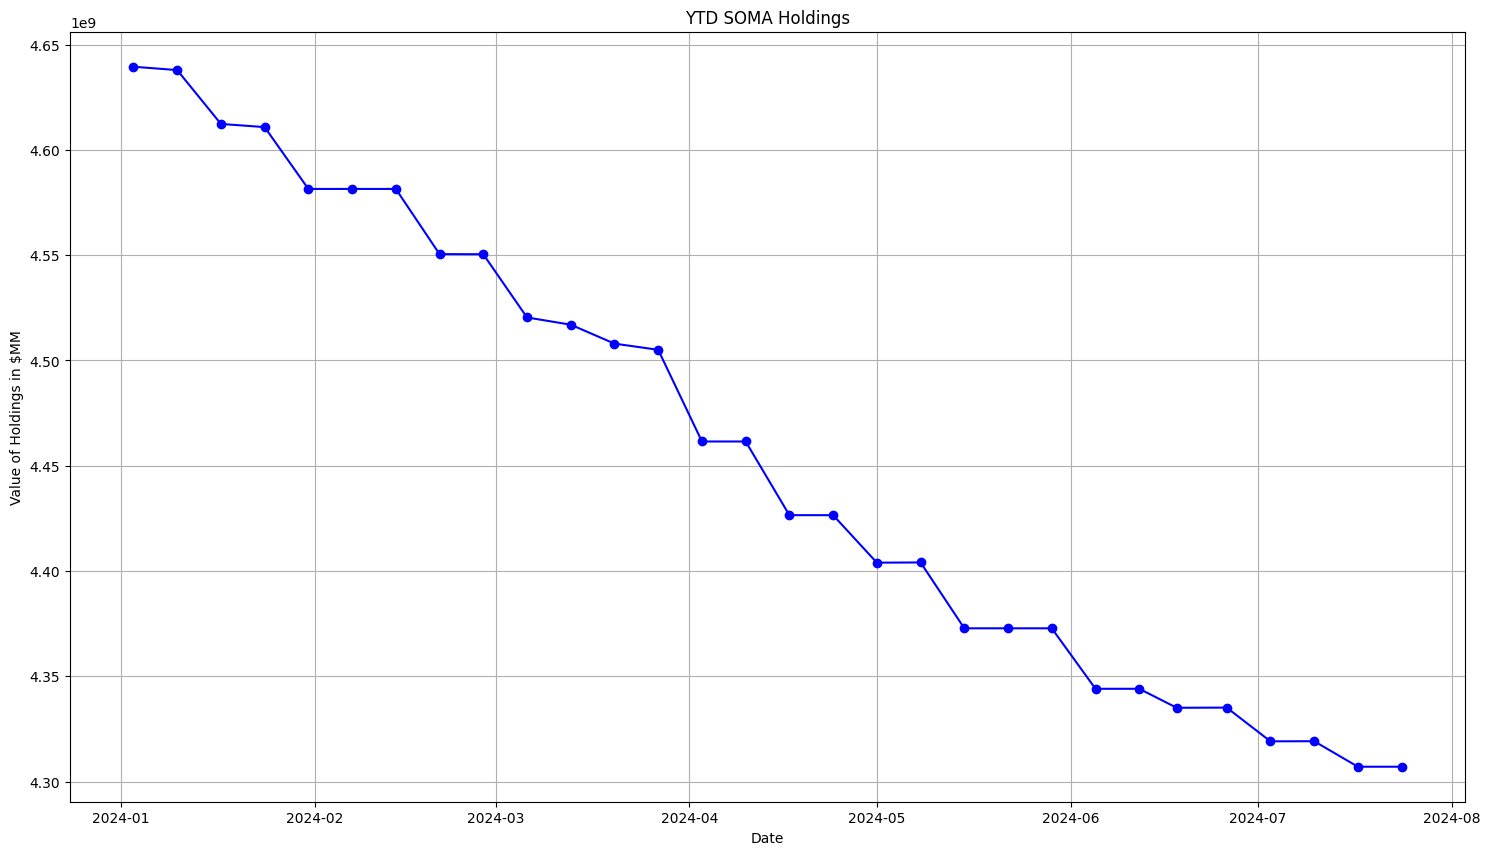

In [26]:
import matplotlib.pyplot as plt

par_value_over_time = {}
for dt, df in soma_holdings_dict_df.items():
    par_value_over_time[dt] = df["parValue"].sum()

par_value_over_time = pd.Series(par_value_over_time)
par_value_over_time = par_value_over_time.sort_index()
display(par_value_over_time)
plt.figure(figsize=(18, 10))
plt.plot(par_value_over_time.index, par_value_over_time.values / 1000, marker='o', linestyle='-', color='b')
plt.title("YTD SOMA Holdings")
plt.xlabel("Date")
plt.ylabel("Value of Holdings in $MM")
plt.grid(True)
plt.show()

# Other Cool Stuff:

In [92]:
import pandas as pd
import aiohttp
import requests
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import QuantLib as ql
from typing import List, Dict, Tuple, Optional, Literal 

import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [53]:
def fetch_historical_prices(dates: List[datetime], cusips: List[str]) -> Dict[str, str]:
    url = "https://savingsbonds.gov/GA-FI/FedInvest/selectSecurityPriceDate"
    headers = {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "Accept-Encoding": "gzip, deflate, br, zstd",
        "Accept-Language": "en-US,en;q=0.9",
        "Cache-Control": "max-age=0",
        "Connection": "keep-alive",
        "Content-Length": "73",
        "Content-Type": "application/x-www-form-urlencoded",
        "Dnt": "1",
        "Host": "savingsbonds.gov",
        "Origin": "https://savingsbonds.gov",
        "Referer": "https://savingsbonds.gov/GA-FI/FedInvest/selectSecurityPriceDate",
        "Sec-Ch-Ua": '"Google Chrome";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
        "Sec-Ch-Ua-Mobile": "?0",
        "Sec-Ch-Ua-Platform": '"Windows"',
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36",
    }

    def build_date_payload(date: datetime):
        return {
            "priceDate.month": date.month,
            "priceDate.day": date.day,
            "priceDate.year": date.year,
            "submit": "Show Prices",
        }

    async def fetch_prices_from_treasury_date_search(
        client: httpx.AsyncClient, date: datetime
    ) -> Dict:
        payload = build_date_payload(date)
        try:
            response = await client.post(url, data=payload, follow_redirects=True)
            response.raise_for_status()
            tables = pd.read_html(response.content)
            df = tables[0]
            missing_cusips = [
                cusip for cusip in cusips if cusip not in df["CUSIP"].values
            ]
            if missing_cusips:
                print(
                    f"The following CUSIPs are not found in the DataFrame: {missing_cusips}"
                )
            df = df[df["CUSIP"].isin(cusips)] if cusips else df
            return date, df
        except httpx.HTTPStatusError as e:
            print(f"HTTP error status: {e.response.status_code}")
            return date, pd.DataFrame()
        except Exception as e:
            print(f"An error occurred: {e}")
            return date, pd.DataFrame()

    timeout = httpx.Timeout(10)

    async def run_fetch_all(dates: List[datetime]) -> List[Dict]:
        async with httpx.AsyncClient(
            headers=headers,
            timeout=timeout,
        ) as client:
            tasks = [
                fetch_prices_from_treasury_date_search(client=client, date=date)
                for date in dates
            ]
            results = await asyncio.gather(*tasks)
            return results

    bonds = asyncio.run(run_fetch_all(dates))
    return dict(bonds)

In [65]:
def get_most_recent_business_day(date: datetime) -> pd.Timestamp:
    date = pd.to_datetime(date)
    if date.weekday() < 5:
        return date
    else:
        return (date - pd.tseries.offsets.BDay(1))
    

def pydatetime_to_qldate(date: datetime) -> ql.Date:
    return ql.Date(date.day, date.month, date.year)


def bill_price_to_ytm(maturity_date: datetime, as_of: datetime, price: float) -> float:
    maturity_ql_date = pydatetime_to_qldate(maturity_date)
    settlement_date = (pd.to_datetime(as_of) + pd.tseries.offsets.BDay(1)).to_pydatetime()
    settlement_ql_date = pydatetime_to_qldate(settlement_date)
    
    day_count = ql.Actual360() 
    bond = ql.ZeroCouponBond(1, ql.UnitedStates(ql.UnitedStates.GovernmentBond), 100, maturity_ql_date)
    ytm = bond.bondYield(price, day_count, ql.Simple, ql.Once, settlement_ql_date)
    return ytm * 100


def coupon_bond_price_to_ytm(
    issue_date: datetime, maturity_date: datetime, as_of: datetime, coupon: float, price: float
) -> float:
    issue_ql_date = pydatetime_to_qldate(issue_date)
    maturity_ql_date = pydatetime_to_qldate(maturity_date)
    settlement_date = (pd.to_datetime(as_of) + pd.tseries.offsets.BDay(2)).to_pydatetime()
    settlement_ql_date = pydatetime_to_qldate(settlement_date)
    
    clean_price = price 
    coupon_rate = coupon / 100
    day_count = ql.ActualActual(ql.ActualActual.Bond) 
    coupon_frequency = ql.Semiannual
    schedule = ql.Schedule(
        issue_ql_date,
        maturity_ql_date,
        ql.Period(coupon_frequency),
        ql.UnitedStates(ql.UnitedStates.GovernmentBond),
        ql.Unadjusted,
        ql.Unadjusted,
        ql.DateGeneration.Backward,
        False,
    )
    
    settlement_days = 2
    bond = ql.FixedRateBond(settlement_days, 100.0, schedule, [coupon_rate], day_count)
    bond_price_handle = ql.QuoteHandle(ql.SimpleQuote(clean_price))
    bond_engine = ql.DiscountingBondEngine(
        ql.YieldTermStructureHandle(ql.FlatForward(settlement_ql_date, 0.0, day_count))
    )
    bond.setPricingEngine(bond_engine)
    ytm = bond.bondYield(
        bond_price_handle.currentLink().value(), day_count, ql.Compounded, coupon_frequency
    )
    return ytm * 100


def bond_price_to_ytm(type: Literal["Bill", "Note", "Bond"], issue_date: datetime, maturity_date: datetime, as_of: datetime, coupon: float, price: float):
    if type == "Bill":
        return bill_price_to_ytm(maturity_date=maturity_date, as_of=as_of, price=price)
    
    return coupon_bond_price_to_ytm(issue_date=issue_date, maturity_date=maturity_date, as_of=as_of, coupon=coupon, price=price)

In [68]:
def get_on_the_run_cusips(to_xlsx=False) -> pd.DataFrame:
    url = "https://treasurydirect.gov/TA_WS/securities/auctioned"
    res = requests.get(url)
    if res.ok:
        json_data = res.json()
        df = pd.DataFrame(json_data)

        # Filtering logic to get just vanilla USTs
        df = df[(df["type"] != "TIPS") & (df["type"] != "FRN") & (df["type"] != "CMB")]
        df = df.drop(
            df[
                (df["type"] == "Bill")
                & (df["originalSecurityTerm"] != df["securityTerm"])
            ].index
        )

        df["issueDate"] = pd.to_datetime(df["issueDate"])
        df["auctionDate"] = pd.to_datetime(df["auctionDate"])
        df["maturityDate"] = pd.to_datetime(df["maturityDate"])
        df = df[df["issueDate"] < datetime.today()] 
        result = df.groupby("originalSecurityTerm").first().reset_index()
        otr_df = result[
            [
                "originalSecurityTerm",
                "type",
                "cusip",
                "interestRate",
                "highInvestmentRate",
                "auctionDate",
                "issueDate",
                "maturityDate",
            ]
        ]
        mapping = {
            "17-Week": 0.25,
            "26-Week": 0.5,
            "52-Week": 1,
            "2-Year": 2,
            "3-Year": 3,
            "5-Year": 5,
            "7-Year": 7,
            "10-Year": 10,
            "20-Year": 20,
            "30-Year": 30,
        }
        otr_df["targetTenor"] = otr_df["originalSecurityTerm"].replace(mapping)
        otr_df = otr_df.sort_values(by="targetTenor", ascending=True)
        otr_df = otr_df.reset_index(drop=True)
        otr_df = otr_df.iloc[1:]
        otr_df = otr_df.replace("", np.nan)
        otr_df["interestRate"] = otr_df["interestRate"].fillna(
            otr_df["highInvestmentRate"]
        )
        otr_df = otr_df.drop(["highInvestmentRate"], axis=1).rename(
            columns={"interestRate": "coupon"}
        )
        otr_df["coupon"] = pd.to_numeric(otr_df["coupon"], errors='coerce') 
        last_bday: pd.Timestamp = get_most_recent_business_day(datetime.today())
        print(f"Using Data as of: {last_bday.strftime("%Y-%m-%d")} Close")
        otr_df["timeToMaturity"] = (otr_df["maturityDate"] - last_bday).dt.days / 365

        otr_prices_df = fetch_historical_prices(
            dates=[last_bday.to_pydatetime()], cusips=otr_df["cusip"].to_list()
        )[last_bday.to_pydatetime()]
        otr_df = pd.merge(
            otr_df,
            right=otr_prices_df[["BUY", "SELL", "CUSIP"]].rename(
                columns={"CUSIP": "cusip", "BUY": "offerPrice", "SELL": "bidPrice"}
            ),
            on="cusip",
        )
        otr_df["midPrice"] = (otr_df["offerPrice"] + otr_df["bidPrice"]) / 2 

        otr_df["offerYield"] = otr_df.apply(
            lambda row: bond_price_to_ytm(
                type=row["type"],
                issue_date=row["issueDate"],
                maturity_date=row["maturityDate"],
                coupon=row["coupon"],
                price=row["offerPrice"],
                as_of=last_bday,
            ),
            axis=1,
        )
        otr_df["bidYield"] = otr_df.apply(
            lambda row: bond_price_to_ytm(
                type=row["type"],
                issue_date=row["issueDate"],
                maturity_date=row["maturityDate"],
                coupon=row["coupon"],
                price=row["bidPrice"],
                as_of=last_bday,
            ),
            axis=1,
        )
        otr_df["midYield"] = (otr_df["offerYield"] + otr_df["bidYield"]) / 2 

        if to_xlsx:
            result.to_excel("on_the_run_cusips.xlsx")
        
    return otr_df

In [69]:
otr_df = get_on_the_run_cusips()
otr_df

Using Data as of: 2024-07-29 Close


,originalSecurityTerm,type,cusip,coupon,auctionDate,issueDate,maturityDate,targetTenor,timeToMaturity,offerPrice,bidPrice,midPrice,offerYield,bidYield,midYield
0,26-Week,Bill,912797LY1,5.185,2024-07-15,2024-07-18,2025-01-16,0.5,0.465753,97.651125,97.648750,97.649937,5.093734,5.099008,5.096371
1,52-Week,Bill,912797LW5,5.024,2024-07-09,2024-07-11,2025-07-10,1.0,0.945205,95.583694,95.578889,95.581291,4.821240,4.826728,4.823984
2,2-Year,Note,91282CKY6,4.625,2024-06-25,2024-07-01,2026-06-30,2.0,1.917808,100.375000,100.375000,100.375000,4.416832,4.416832,4.416832
3,3-Year,Note,91282CKZ3,4.375,2024-07-09,2024-07-15,2027-07-15,3.0,2.958904,100.500000,100.500000,100.500000,4.192767,4.192767,4.192767
4,5-Year,Note,91282CKX8,4.250,2024-06-26,2024-07-01,2029-06-30,5.0,4.920548,100.781250,100.781250,100.781250,4.068085,4.068085,4.068085
5,7-Year,Note,91282CKW0,4.250,2024-06-27,2024-07-01,2031-06-30,7.0,6.920548,100.921875,100.906250,100.914062,4.094874,4.097477,4.096176
6,10-Year,Note,91282CKQ3,4.375,2024-07-10,2024-07-15,2034-05-15,10.0,9.797260,101.609375,101.593750,101.601562,4.173217,4.175160,4.174188
7,20-Year,Bond,912810UB2,4.625,2024-06-18,2024-07-01,2044-05-15,20.0,19.805479,101.421875,101.406250,101.414062,4.515014,4.516204,4.515609
8,30-Year,Bond,912810UA4,4.625,2024-07-11,2024-07-15,2054-05-15,30.0,29.810959,103.328125,103.312500,103.320312,4.422862,4.423790,4.423326


In [87]:
def fetch_par_yields_from_ust(years: List[int], download=False, path: Optional[None] = None) -> pd.DataFrame:
    dir_path = os.path.join(os.path.dirname(os.path.realpath('__file__')), path or "data") 

    async def fetch_from_treasurygov(
        session: aiohttp.ClientSession, url: str, curr_year: int
    ) -> pd.DataFrame:
        headers = {
            "authority": "home.treasury.gov",
            "method": "GET",
            "path": f"/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={curr_year}",
            "scheme": "https",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
            "Accept-Encoding": "gzip, deflate, br",
            "Accept-Language": "en-US,en;q=0.9",
            "Cache-Control": "max-age=0",
            "Dnt": "1",
            "Sec-Ch-Ua": '"Chromium";v="116", "Not)A;Brand";v="24", "Google Chrome";v="116"',
            "Sec-Ch-Ua-Mobile": "?0",
            "Sec-Ch-Ua-Platform": "Windows",
            "Sec-Fetch-Dest": "document",
            "Sec-Fetch-Mode": "navigate",
            "Sec-Fetch-Site": "none",
            "Sec-Fetch-User": "?1",
            "Upgrade-Insecure-Requests": "1",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36",
        } 
        try:
            treasurygov_data_type = "".join(url.split("?type=")[1].split("&field")[0])
            full_file_path = os.path.join(dir_path, "temp", f"{treasurygov_data_type}.csv")
            async with session.get(url, headers=headers) as response:
                if response.status == 200:
                    with open(full_file_path, "wb") as f:
                        chunk_size = 8192
                        while True:
                            chunk = await response.content.read(chunk_size)
                            if not chunk:
                                break
                            f.write(chunk)
                    return {
                        treasurygov_data_type: await convert_csv_to_excel(
                            full_file_path
                        )
                    }
                else:
                    raise Exception(f"Bad Status: {response.status}")
        except Exception as e:
            print(e) 
            return {treasurygov_data_type: pd.DataFrame()}

    async def convert_csv_to_excel(full_file_path: str | None) -> str:
        if not full_file_path:
            return

        copy = full_file_path
        rdir_path = copy.split("\\")
        rdir_path.remove("temp")
        renamed = str.join("\\", rdir_path)
        renamed = f"{renamed.split('.')[0]}.xlsx"

        df_temp = pd.read_csv(full_file_path)
        df_temp["Date"] = pd.to_datetime(df_temp["Date"])
        df_temp["Date"] = df_temp["Date"].dt.strftime("%Y-%m-%d")
        if download:
            df_temp.to_excel(f"{renamed.split('.')[0]}.xlsx", index=False)
        os.remove(full_file_path)
        return df_temp
    
    async def get_promises(session: aiohttp.ClientSession):
        tasks = []
        for year in years:
            daily_par_yield_curve_url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_yield_curve&field_tdr_date_value={year}&page&_format=csv"
            daily_par_real_yield_curve_url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_real_yield_curve&field_tdr_date_value={year}&amp;page&amp;_format=csv"
            daily_treasury_bill_rates_url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_bill_rates&field_tdr_date_value={year}&page&_format=csv"
            daily_treaury_long_term_rates_extrapolation_factors_url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_long_term_rate&field_tdr_date_value={year}&page&_format=csv"
            daily_treasury_real_long_term_rates_averages = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_real_long_term&field_tdr_date_value={year}&page&_format=csv"
            tasks.extend(
                [
                    fetch_from_treasurygov(
                        session, daily_par_yield_curve_url, year
                    ),
                    fetch_from_treasurygov(
                        session, daily_par_real_yield_curve_url, year
                    ),
                    fetch_from_treasurygov(
                        session, daily_treasury_bill_rates_url, year
                    ),
                    fetch_from_treasurygov(
                        session,
                        daily_treaury_long_term_rates_extrapolation_factors_url,
                        year,
                    ),
                    fetch_from_treasurygov(
                        session, daily_treasury_real_long_term_rates_averages, year
                    ),
                ]
            )

        return await asyncio.gather(*tasks)

    async def run_fetch_all() -> List[pd.DataFrame]:
        async with aiohttp.ClientSession() as session:
            all_data = await get_promises(session)
            return all_data

    os.mkdir(f"{dir_path}/temp")
    dfs: List[Dict[str, pd.DataFrame]] = asyncio.run(run_fetch_all())
    shutil.rmtree(f"{dir_path}/temp")
    
    organized_by_ust_type_dict: Dict[str, List[pd.DataFrame]] = {}
    for dictionary in dfs:
        ust_data_type, df = next(iter(dictionary)), next(iter(dictionary.values()))
        if not ust_data_type or df is None or df.empty:
            continue
        if ust_data_type not in organized_by_ust_type_dict:
            organized_by_ust_type_dict[ust_data_type] = []
        organized_by_ust_type_dict[ust_data_type].append(df)

    organized_by_ust_type_df_dict_concated: Dict[str, pd.DataFrame] = {}
    for ust_data_type in organized_by_ust_type_dict.keys():
        dfs = organized_by_ust_type_dict[ust_data_type]
        concated_df = pd.concat(dfs, ignore_index=True)
        organized_by_ust_type_df_dict_concated[ust_data_type] = concated_df

    return organized_by_ust_type_df_dict_concated

In [110]:
# more eff way
# years = [x for x in range(2024, 2015, -1)]

par_yields_df = fetch_par_yields_from_ust(years=[2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])["daily_treasury_yield_curve"]
par_yields_df["Date"] = pd.to_datetime(par_yields_df["Date"])
par_yields_df

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-29,5.50,5.51,5.41,5.36,5.18,4.79,4.36,4.19,4.05,4.08,4.17,4.51,4.42
1,2024-07-26,5.49,5.51,5.38,5.36,5.18,4.79,4.36,4.20,4.06,4.10,4.20,4.53,4.45
2,2024-07-25,5.49,5.52,5.39,5.37,5.19,4.83,4.41,4.26,4.13,4.18,4.27,4.59,4.50
3,2024-07-24,5.50,5.50,5.40,5.37,5.19,4.82,4.37,4.24,4.12,4.20,4.28,4.62,4.54
4,2024-07-23,5.49,5.51,5.41,5.38,5.22,4.85,4.40,4.26,4.15,4.18,4.25,4.56,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,2014-01-08,0.00,NaN,0.05,NaN,0.08,0.13,0.43,0.87,1.77,2.44,3.01,3.67,3.90
2641,2014-01-07,0.01,NaN,0.04,NaN,0.08,0.13,0.40,0.80,1.69,2.37,2.96,3.64,3.88
2642,2014-01-06,0.01,NaN,0.05,NaN,0.08,0.12,0.40,0.78,1.70,2.38,2.98,3.66,3.90
2643,2014-01-03,0.02,NaN,0.07,NaN,0.10,0.13,0.41,0.80,1.73,2.42,3.01,3.69,3.93


<Axes: title={'center': 'Par Yield Curve Correlation Matrix'}>

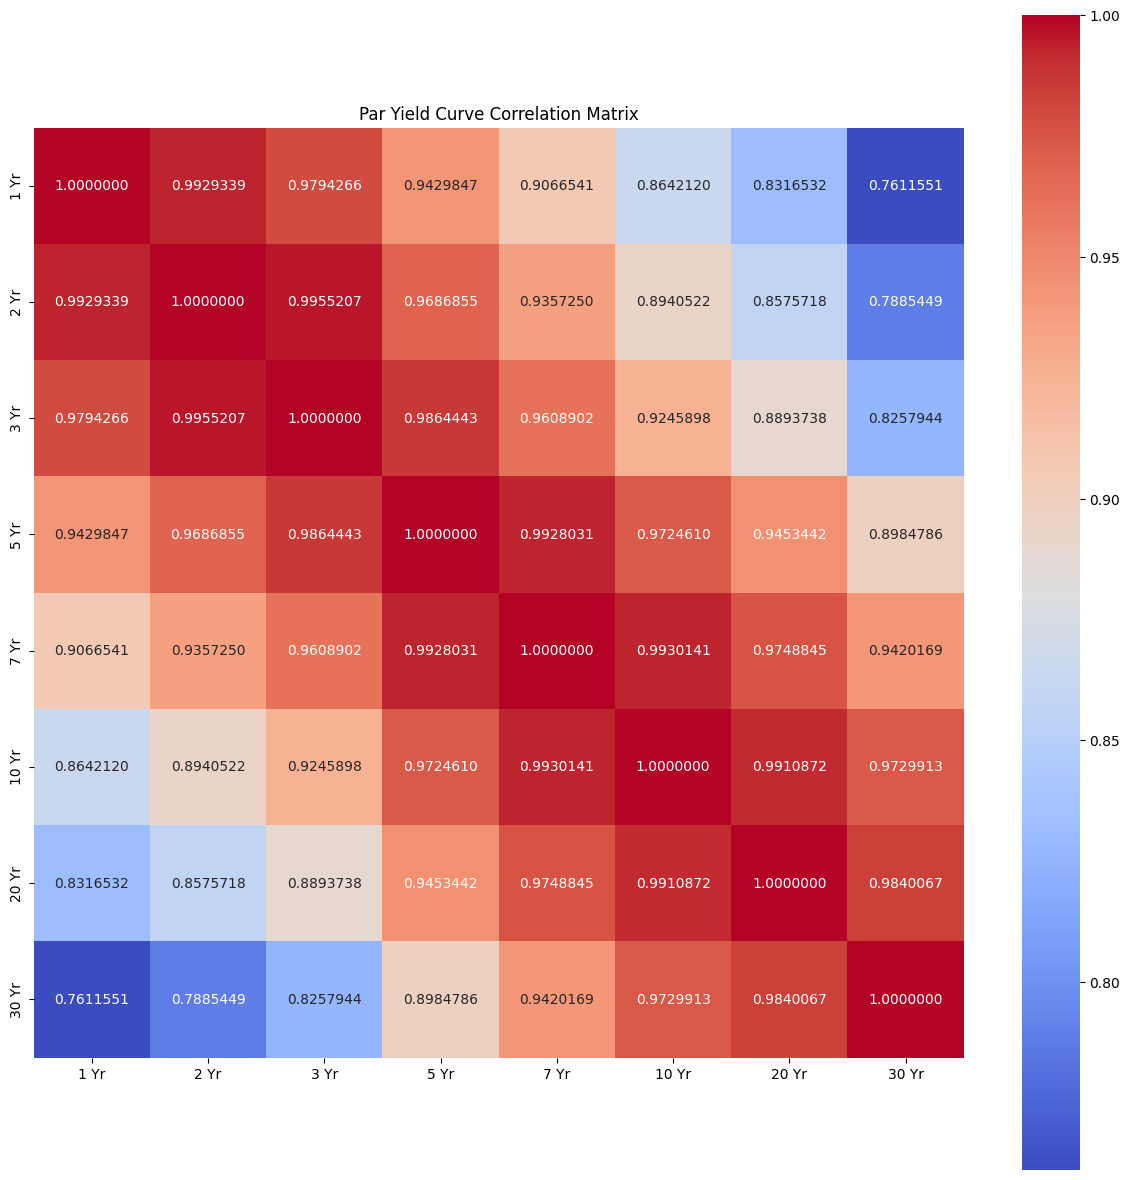

In [111]:
correlation = par_yields_df[["1 Yr", "2 Yr", "3 Yr", "5 Yr", "7 Yr", "10 Yr", "20 Yr", "30 Yr"]].corr()
plt.figure(figsize=(15, 15))
plt.title("Par Yield Curve Correlation Matrix")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="coolwarm", fmt=".7f")

- Let's say that i dont know shit about the yield curve and i want to explore if a 2s10s steepener is related to a 2s10s30s butterfly

                            OLS Regression Results                            
Dep. Variable:               2s10s30s   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 4.188e+04
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:43:32   Log-Likelihood:                 1374.2
No. Observations:                2645   AIC:                            -2744.
Df Residuals:                    2643   BIC:                            -2733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3057      0.004     84.526      0.0

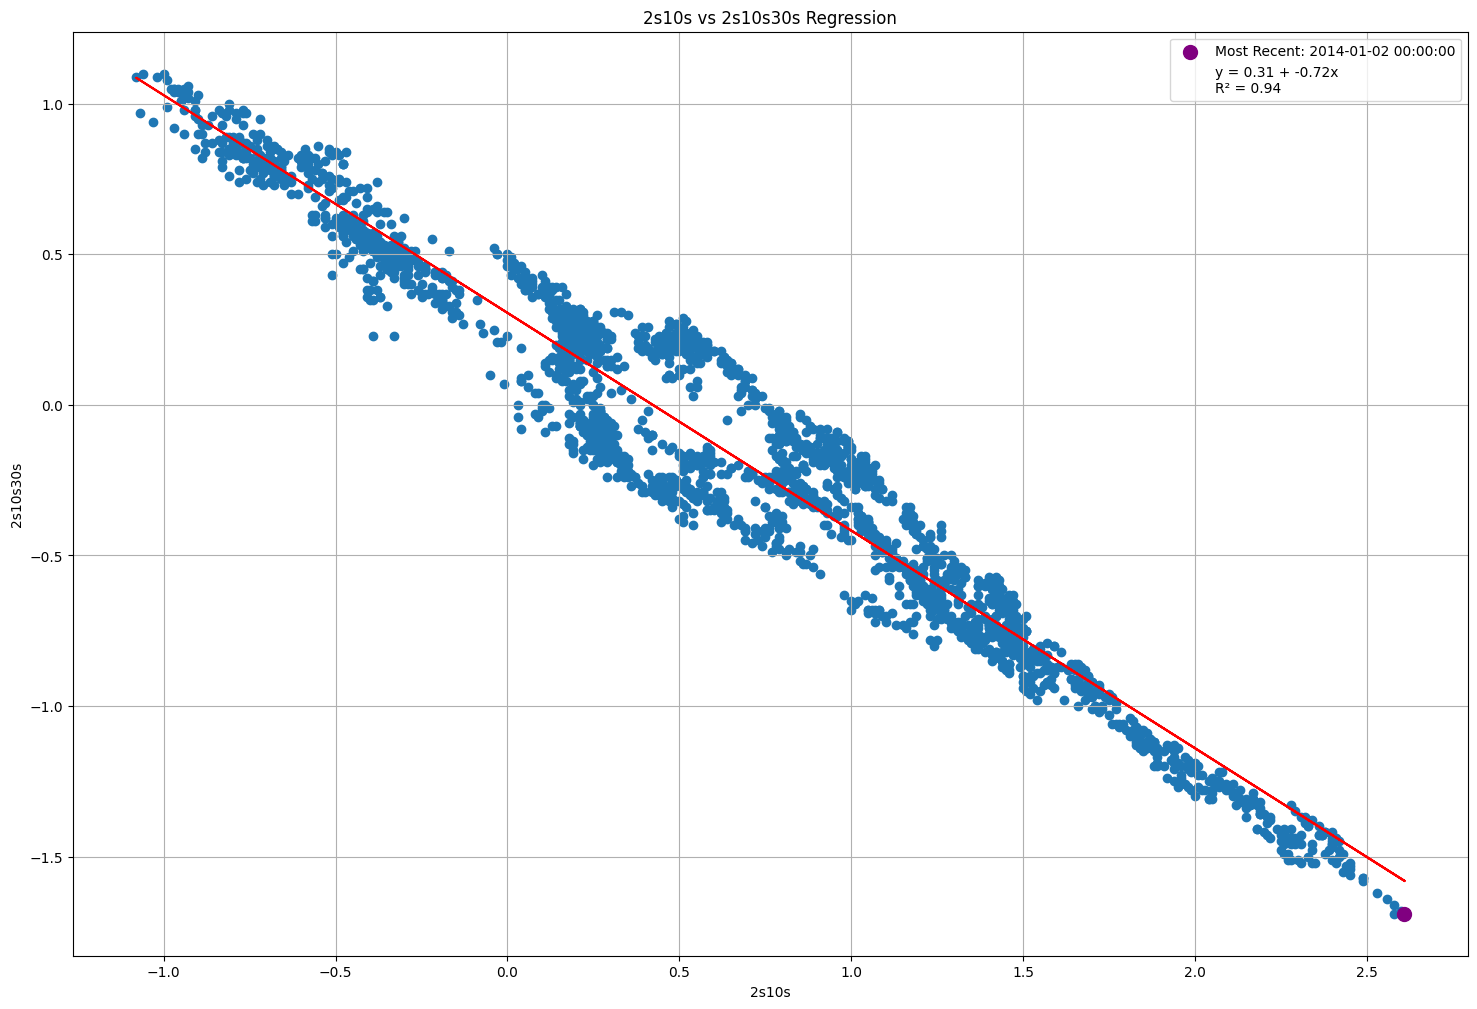

In [115]:
import statsmodels.api as sm

par_yields_df["2s10s"] = par_yields_df["10 Yr"] - par_yields_df["2 Yr"]
par_yields_df["2s10s30s"] = (par_yields_df["30 Yr"] - par_yields_df["10 Yr"]) - (
    par_yields_df["10 Yr"] - par_yields_df["2 Yr"]
)

Y = par_yields_df["2s10s30s"]
X = par_yields_df["2s10s"]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

intercept = results.params[0]
slope = results.params[1]
r_squared = results.rsquared

plt.figure(figsize=(18, 12))
plt.scatter(par_yields_df["2s10s"], par_yields_df["2s10s30s"])
plt.scatter(
    par_yields_df["2s10s"].iloc[-1],
    par_yields_df["2s10s30s"].iloc[-1],
    color="purple",
    s=100,
    label=f"Most Recent: {par_yields_df["Date"].iloc[-1]}",
)

regression_line = intercept + slope * par_yields_df["2s10s"]
plt.plot(par_yields_df["2s10s"], regression_line, color="red")

plt.xlabel("2s10s")
plt.ylabel("2s10s30s")
plt.title("2s10s vs 2s10s30s Regression")

equation_text = f"y = {intercept:.2f} + {slope:.2f}x\nR² = {r_squared:.2f}"
plt.plot([], [], ' ', label=f"{equation_text}")

plt.legend()
plt.grid(True)
plt.show()